# Multiple Linear Regression Model to Predict the Market Value of Footballers

## Fitting data to model using sklearn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import math

### Goalkeepers

Intercept: 
 33.45314061561668
Coefficients: 
 [ -0.39037387 -12.09638312   0.20993442   0.13766615]


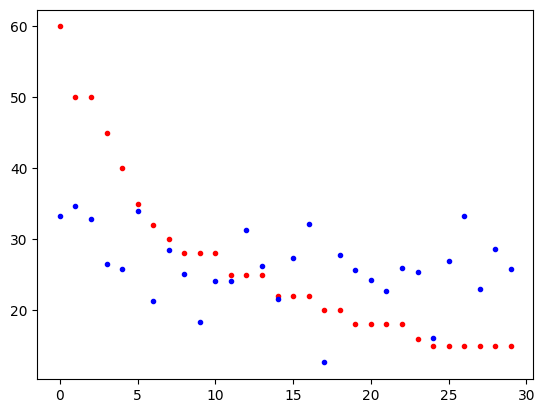

In [2]:
data_gk = pd.read_csv("Market value 21-22 season (via Transfermarkt) - Goalkeepers.csv")
data_gk["Market Value"] = [int(x.split()[0]) for x in data_gk["Market Value"]]
data_gk.insert(loc=2, column='one', value=1)

x_gk = data_gk[["Age", "Goals conceded/90", "Save %", "Penalty save %"]]
y_gk = data_gk["Market Value"]

reg_gk = linear_model.LinearRegression()
reg_gk.fit(x_gk, y_gk)

print('Intercept: \n', reg_gk.intercept_)
print('Coefficients: \n', reg_gk.coef_)

predicted_gk = reg_gk.predict(x_gk)

plt.figure()
plt.plot(data_gk["Market Value"], ".r")
plt.plot(predicted_gk, ".b")
plt.show()

#### Equation: $ y = 33.45 - 0.39x_1 - 12.10x_2 + 0.21x_3 + 0.14x_4$, 
#### $x_1 = $ age, $x_2 = $ goals conceded/90, $x_3$ = save %, $x_4 = $ penalty save %

### Defenders

Intercept: 
 51.16766180317448
Coefficients: 
 [-0.7057279  -2.010505   -8.24931779  2.03496421 -3.69016489  1.86813131
  0.27591426]


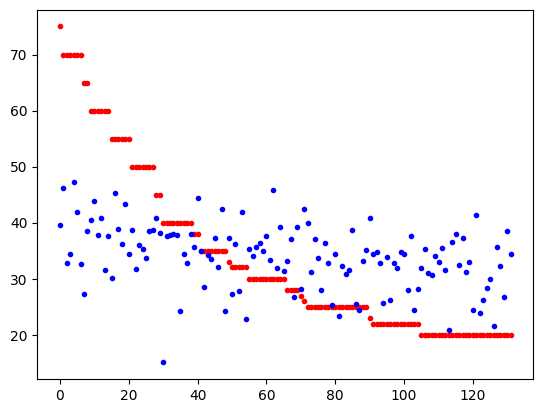

In [3]:
data_defenders = pd.read_csv("Market value 21-22 season (via Transfermarkt) - Defenders.csv")
data_defenders["Market Value"] = [int(x.split()[0]) for x in data_defenders["Market Value"]]
data_defenders.insert(loc=2, column='one', value=1)

x_defenders = data_defenders[["Age", "Tackles/90", "Interceptions/90", "Blocks/90", "Clearances/90","Progressive passes/90", "Aerial duels won %"]]
y_defenders = data_defenders["Market Value"]

reg_defenders = linear_model.LinearRegression()
reg_defenders.fit(x_defenders, y_defenders)

print('Intercept: \n', reg_defenders.intercept_)
print('Coefficients: \n', reg_defenders.coef_)

predicted_defenders = reg_defenders.predict(x_defenders)

plt.figure()
plt.plot(data_defenders["Market Value"], ".r")
plt.plot(predicted_defenders, ".b")
plt.show()

#### Equation $y = 51.17 - 0.71x_1 - 2.01x_2 - 8.25 x_3 - 2.03x_4 - 3.69x_5 + 1.86x_6 + 0.28x_7$
#### $x_1 = $ age, $x_2 = $ tackles/90, $x_3$ = interceptions/90, $x_4 = $ blocks/90, $x_5$ = clearances/90, $x_6 = $ progressive passes/90 ,$x_7 = $ aerial duels won %

### Forwards

Intercept: 
 58.69015687908969
Coefficients: 
 [-1.98420361 51.2277811  12.97473877  0.17402375 11.36725295]


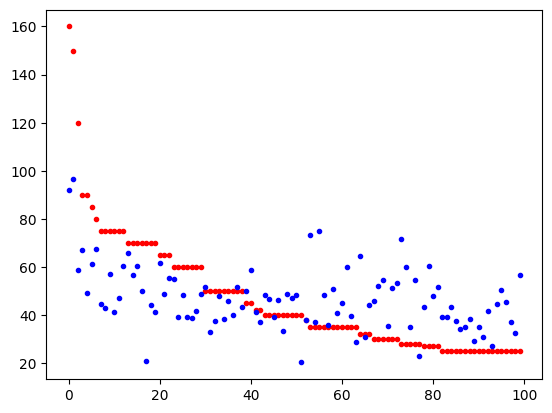

In [4]:
data_forwards = pd.read_csv("Market value 21-22 season (via Transfermarkt) - Forwards.csv")
data_forwards["Market Value"] = [int(x.split()[0]) for x in data_forwards["Market Value"]]
data_forwards.insert(loc=2, column='one', value=1)

x_forwards = data_forwards[["Age", "Goals/90", "Assists/90", "Shot on target %", "Goal-creating actions/90"]]
y_forwards = data_forwards["Market Value"]

reg_forwards = linear_model.LinearRegression()
reg_forwards.fit(x_forwards, y_forwards)

print('Intercept: \n', reg_forwards.intercept_)
print('Coefficients: \n', reg_forwards.coef_)

predicted_forwards = reg_forwards.predict(x_forwards)

plt.figure()
plt.plot(data_forwards["Market Value"], ".r")
plt.plot(predicted_forwards, ".b")
plt.show()

#### Equation: $y = 58.69 - 1.98x_1 + 51.23x_2 + 12.97x_3 + 0.17x_4 + 11.37x_5$
#### $x_1 = $ age, $x_2 = $ goals/90, $x_3$ = assists/90, $x_4 = $ shot on target %, $x_5$ = goal-creating actions/90

## Testing the significance of each model using ANOVA
#### $H_0: \beta_1 = \beta_2 = .... = \beta_k = 0$
#### $H_A:$ at least one $\beta_i \neq 0$
#### $\alpha = 0.05$

In [5]:
def goalkeepers(x1, x2, x3, x4):
    return (reg_gk.intercept_ + reg_gk.coef_[0]*x1 + reg_gk.coef_[1]*x2 + reg_gk.coef_[2]*x3 + reg_gk.coef_[3]*x4)
    
def defender(x1, x2, x3, x4, x5, x6, x7):
    return reg_defenders.intercept_ + reg_defenders.coef_[0]*x1 + reg_defenders.coef_[1]*x2 + reg_defenders.coef_[2]*x3 + reg_defenders.coef_[3]*x4 + reg_defenders.coef_[4]*x5 + reg_defenders.coef_[5]*x6 + reg_defenders.coef_[6]*x7

def forwards(x1, x2, x3, x4, x5):
    return reg_forwards.intercept_ + reg_forwards.coef_[0]*x1 + reg_forwards.coef_[1]*x2 + reg_forwards.coef_[2]*x3 + reg_forwards.coef_[3]*x4 + reg_forwards.coef_[4]*x5  

### Goalkeepers

In [6]:
SSR_gk = 0
SSE_gk = 0
mv_gk = data_gk['Market Value'].values
x1_gk = data_gk['Age'].values
x2_gk = data_gk['Goals conceded/90'].values
x3_gk = data_gk['Save %'].values
x4_gk = data_gk['Penalty save %'].values
ybar_gk = np.mean(mv_gk)
n_gk = len(mv_gk)
k_gk = 4

for i in range(n_gk):
    SSR_gk += (goalkeepers(x1_gk[i], x2_gk[i], x3_gk[i], x4_gk[i]) - ybar_gk)**2
    SSE_gk += (mv_gk[i] - goalkeepers(x1_gk[i], x2_gk[i], x3_gk[i], x4_gk[i]))**2


MSR_gk = SSR_gk/k_gk
MSE_gk = SSR_gk/(n_gk - k_gk - 1)

F_gk = MSR_gk/MSE_gk

F_gk

6.25

##### $VR = 6.25$, $F_{4,25} = 2.759$
#####  Reject null hypothesis, conclude that model is significant at $\alpha = $ 0.05

### Defenders

In [7]:
SSR_def = 0
SSE_def = 0
mv_def = data_defenders['Market Value'].values
x1_def = data_defenders['Age'].values
x2_def = data_defenders['Tackles/90'].values
x3_def = data_defenders['Interceptions/90'].values
x4_def = data_defenders['Blocks/90'].values
x5_def = data_defenders['Clearances/90'].values
x6_def = data_defenders['Progressive passes/90'].values
x7_def = data_defenders['Aerial duels won %'].values
ybar_def = np.mean(mv_def)
n_def = len(mv_def)
k_def = 7

for i in range(n_def):
    SSR_def += (defender(x1_def[i], x2_def[i], x3_def[i], x4_def[i], x5_def[i], x6_def[i], x7_def[i]) - ybar_def)**2
    SSE_def += (mv_def[i] - defender(x1_def[i], x2_def[i], x3_def[i], x4_def[i], x5_def[i], x6_def[i], x7_def[i]))**2

MSR_def = SSR_def/k_def
MSE_def = SSE_def/(n_def - k_def - 1)

F_def = MSR_def/MSE_def

F_def


3.0110627883813437

##### $VR = 3.01$, $F_{7,124} = 2.084$
#####  Reject null hypothesis, conclude that model is significant at $\alpha = $ 0.05

### Forwards

In [8]:
SSR_fwd = 0
SSE_fwd = 0
mv_fwd = data_forwards['Market Value'].values
x1_fwd = data_forwards['Age'].values
x2_fwd = data_forwards['Goals/90'].values
x3_fwd = data_forwards['Assists/90'].values
x4_fwd = data_forwards['Shot on target %'].values
x5_fwd = data_forwards['Goal-creating actions/90'].values
ybar_fwd = np.mean(mv_fwd)
n_fwd = len(mv_fwd)
k_fwd = 5

for i in range(n_fwd):
    SSR_fwd += (forwards(x1_fwd[i], x2_fwd[i], x3_fwd[i], x4_fwd[i], x5_fwd[i]) - ybar_fwd)**2
    SSE_fwd += (mv_fwd[i] - forwards(x1_fwd[i], x2_fwd[i], x3_fwd[i], x4_fwd[i], x5_fwd[i]))**2

MSR_fwd = SSR_fwd/k_fwd
MSE_fwd = SSE_fwd/(n_fwd - k_fwd - 1)

F_fwd = MSR_fwd/MSE_fwd

F_fwd


6.943293028804491

##### $VR = 6.94$, $F_{5,94} = 2.31$
#####  Reject null hypothesis, conclude that model is significant at $\alpha = $ 0.05

## Covariance matrices

### Goalkeepers

In [9]:
matrix_gk = data_gk[['one', 'Age', 'Goals conceded/90', 'Save %', 'Penalty save %']].to_numpy()
cov_gk = np.linalg.inv(matrix_gk.transpose().dot(matrix_gk))
print(cov_gk)


[[ 1.87140659e+01 -6.08586647e-02 -2.35125153e+00 -1.98245407e-01
  -1.67697690e-03]
 [-6.08586647e-02  3.21323802e-03  1.02512329e-02 -5.34398107e-04
  -1.65728365e-05]
 [-2.35125153e+00  1.02512329e-02  5.72997866e-01  1.92358042e-02
   1.83272428e-03]
 [-1.98245407e-01 -5.34398107e-04  1.92358042e-02  2.65203521e-03
  -2.89067062e-05]
 [-1.67697690e-03 -1.65728365e-05  1.83272428e-03 -2.89067062e-05
   1.39823743e-04]]


### Defenders

In [10]:
matrix_def = data_defenders[['one', 'Age', 'Tackles/90', 'Interceptions/90', 'Blocks/90', 'Clearances/90','Progressive passes/90', 'Aerial duels won %']].to_numpy()
cov_def = np.linalg.inv(matrix_def.transpose().dot(matrix_def))
print(cov_def)

[[ 1.55223129e+00 -3.52143569e-02 -8.60970498e-02 -7.62905918e-02
  -8.13857175e-02 -5.27778618e-03 -2.29144674e-02 -4.41061143e-03]
 [-3.52143569e-02  1.26662038e-03  1.41051146e-03  2.05304891e-03
   3.72135582e-04 -1.45566137e-04 -1.12062474e-04 -1.28625381e-05]
 [-8.60970498e-02  1.41051146e-03  2.95670370e-02 -6.03707707e-03
  -1.80044487e-02  5.06796078e-03 -2.01211671e-03  3.60320425e-04]
 [-7.62905918e-02  2.05304891e-03 -6.03707707e-03  6.64073546e-02
  -8.92035284e-03 -3.55841087e-03 -2.26772769e-03 -3.14113403e-04]
 [-8.13857175e-02  3.72135582e-04 -1.80044487e-02 -8.92035284e-03
   1.01659442e-01 -1.43295365e-02  4.65979892e-03  4.19230231e-04]
 [-5.27778618e-03 -1.45566137e-04  5.06796078e-03 -3.55841087e-03
  -1.43295365e-02  1.35042930e-02  4.03720476e-03 -5.13607659e-04]
 [-2.29144674e-02 -1.12062474e-04 -2.01211671e-03 -2.26772769e-03
   4.65979892e-03  4.03720476e-03  8.22062977e-03 -1.80963905e-04]
 [-4.41061143e-03 -1.28625381e-05  3.60320425e-04 -3.14113403e-04
   

### Forwards

In [11]:
matrix_fwd = data_forwards[['one', 'Age', 'Goals/90', 'Assists/90', 'Shot on target %', 'Goal-creating actions/90']].to_numpy()
cov_fwd = np.linalg.inv(matrix_fwd.transpose().dot(matrix_fwd))
print(cov_fwd)

[[ 9.51659258e-01 -2.42876849e-02  1.34197683e-01 -4.49299565e-02
  -8.58211065e-03 -8.33959465e-02]
 [-2.42876849e-02  9.58917621e-04 -4.42598760e-03  9.16503056e-04
   5.64812362e-05 -7.02900385e-04]
 [ 1.34197683e-01 -4.42598760e-03  3.04308300e-01  8.09824748e-02
  -3.16078762e-03 -1.06153452e-01]
 [-4.49299565e-02  9.16503056e-04  8.09824748e-02  1.56175224e+00
   1.69627829e-03 -8.14832663e-01]
 [-8.58211065e-03  5.64812362e-05 -3.16078762e-03  1.69627829e-03
   2.11664029e-04 -1.63226035e-04]
 [-8.33959465e-02 -7.02900385e-04 -1.06153452e-01 -8.14832663e-01
  -1.63226035e-04  6.49788839e-01]]


## Testing the significance of each variable

### Goalkeepers

In [12]:
sigma_gk = math.sqrt(MSE_gk)
test_gk = []
results_gk = []

for i in range(len(reg_gk.coef_)):
    test_gk.append(reg_gk.coef_[i]/(sigma_gk*math.sqrt(cov_gk[i+1][i+1])))
for i in range(len(test_gk)):
    if test_gk[i] <= -2.0595 or test_gk[i] >= 2.0595:
        results_gk.append("Reject")
    else:
        results_gk.append("Do not reject")

test_gk ,results_gk

([-1.2275911984784929,
  -2.848547746623937,
  0.7266720729243162,
  2.07530143930767],
 ['Do not reject', 'Reject', 'Do not reject', 'Reject'])

### Defenders

In [13]:
sigma_def = math.sqrt(MSE_def)
test_def = []
results_def = []

for i in range(len(reg_defenders.coef_)):
    test_def.append(reg_defenders.coef_[i]/(sigma_gk*math.sqrt(cov_def[i+1][i+1])))
for i in range(len(test_def)):
    if test_def[i] <= -1.9793 or test_def[i] >= 1.9793:
        results_def.append("Reject")
    else:
        results_def.append("Do not reject")

test_def, results_def

([-3.5347485202944218,
  -2.0842304020479125,
  -5.706297588926953,
  1.137699028378335,
  -5.6604937895296015,
  3.6728173113742955,
  4.8079857365250325],
 ['Reject', 'Reject', 'Reject', 'Do not reject', 'Reject', 'Reject', 'Reject'])

### Forwards

In [14]:
sigma_fwd = math.sqrt(MSE_fwd)
test_fwd = []
results_fwd = []

for i in range(len(reg_forwards.coef_)):
    test_fwd.append(reg_forwards.coef_[i]/(sigma_fwd*math.sqrt(cov_fwd[i+1][i+1])))
for i in range(len(test_fwd)):
    if test_fwd[i] <= -1.9855 or test_fwd[i] >= 1.9855:
        results_fwd.append("Reject")
    else:
        results_fwd.append("Do not reject")

test_fwd, results_fwd

([-2.913224393473409,
  4.222085247556451,
  0.4720314176064654,
  0.543830236216481,
  0.6411324409908152],
 ['Reject', 'Reject', 'Do not reject', 'Do not reject', 'Do not reject'])